In [1]:
#imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pathlib

In [2]:
class_names = ['NonDemented', 'Demented']
num_classes = len(class_names)
batch_size = 64
input_shape = (208, 176, 3)
AUTOTUNE = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

Found 5121 files belonging to 2 classes.
Found 1279 files belonging to 2 classes.


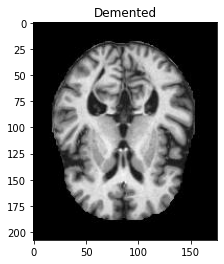

In [3]:
train_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/train')
test_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/test')

train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

for images, labels, in train_dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    
train_dataset = train_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [1]:
#Building the CNN
model = keras.Sequential(
    [
        #Defines the input sizes
        keras.Input(input_shape),
        #Creates the convolutional layer
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D(),
        
        layers.SeparableConv2D(32, kernel_size=(3,3), activation='relu'),
        layers.SeparableConv2D(32, kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.SeparableConv2D(64, kernel_size=(3,3), activation='relu'),
        layers.SeparableConv2D(64, kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.SeparableConv2D(128, kernel_size=(3,3), activation='relu'),
        layers.SeparableConv2D(128, kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Dropout(0.2),
        
        layers.SeparableConv2D(256, kernel_size=(3,3), activation='relu'),
        layers.SeparableConv2D(256, kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Dropout(0.2),
        
        layers.Flatten(),
        
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.7),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(num_classes, activation='softmax'),
    ]
)


NameError: name 'keras' is not defined

In [5]:
epochs = 30
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
 
history = model.fit(train_dataset, epochs=epochs,validation_data=test_dataset)

Epoch 1/30
81/81 [==============================] - 106s 1s/step - loss: 0.7989 - accuracy: 0.5813 - val_loss: 0.7041 - val_accuracy: 0.4996
Epoch 2/30
81/81 [==============================] - 103s 1s/step - loss: 0.6667 - accuracy: 0.6645 - val_loss: 0.7094 - val_accuracy: 0.4996
Epoch 3/30
81/81 [==============================] - 100s 1s/step - loss: 0.6223 - accuracy: 0.6751 - val_loss: 0.6942 - val_accuracy: 0.4996
Epoch 4/30
81/81 [==============================] - 101s 1s/step - loss: 0.5994 - accuracy: 0.6799 - val_loss: 0.7011 - val_accuracy: 0.5004
Epoch 5/30
81/81 [==============================] - 104s 1s/step - loss: 0.5636 - accuracy: 0.7063 - val_loss: 0.7882 - val_accuracy: 0.5004
Epoch 6/30
81/81 [==============================] - 101s 1s/step - loss: 0.5382 - accuracy: 0.7323 - val_loss: 1.3672 - val_accuracy: 0.5004
Epoch 7/30
81/81 [==============================] - 101s 1s/step - loss: 0.5005 - accuracy: 0.7428 - val_loss: 1.8475 - val_accuracy: 0.5004
Epoch 8/30
81

In [20]:
score = model.evaluate(test_dataset,verbose=0)
print("Test loss:",score[0])
print("Test accuracy", score[1])

Test loss: 0.8245311975479126
Test accuracy 0.7419859170913696


In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


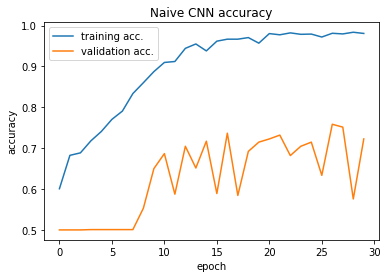

In [27]:

plt.title('Naive CNN accuracy')

plt.plot(history.history['accuracy'], label = "training acc.")
plt.plot(history.history['val_accuracy'], label = "validation acc.")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training acc.', 'validation acc.'], loc='upper left')

plt.savefig("../Project/Result/CNN_PRE_MODEL_ACCURACY")
plt.show()

